In [1]:
import pandas as pd
from numpy.random import randint
import json

In [2]:
from plotting.data.databreach2 import data

In [3]:
print("num data points: ", len(data))
print("columns: ", data[0].keys())

num data points:  540
columns:  dict_keys(['Name', 'Title', 'Domain', 'BreachDate', 'AddedDate', 'ModifiedDate', 'PwnCount', 'Description', 'LogoPath', 'DataClasses', 'IsVerified', 'IsFabricated', 'IsSensitive', 'IsRetired', 'IsSpamList'])


In [4]:
data2 = pd.read_csv("./plotting/data/databreach.csv")

In [5]:
data2

,Date,Org,Category,breach_count,type
0,04-2020,CAM4,live streaming website,10880.0,"[Names,Email addresses,Genders,Chat transcript..."
1,10-2017,Yahoo,web services provider,3000.0,"[ Security questions, security answers]"
2,03-2018,Aadhar,NaN,1100.0,"[ Names, Aadhar number, bank details]"
3,03-2019,First American Financial Corp.,financial services company,885.0,"[bank account records, social security numbers..."
4,02-2019,Verifications.io,security startup,763.0,"[names, phone numbers, IP addresses, dates of ..."
...,...,...,...,...,...
57,10-2019,Multiple Indian Banks,bank,1.3,"[names, emails, phone numbers, addresses]"
58,11-2020,BigBasket,online grocer,20.0,"[email id, phone numbers, order details, addre..."
59,05-2020,Unacademy,education,20.0,"[IDs, passwords, date joined, last login date,..."
60,05-2021,Air India,airlines,4.5,"[passport, credit card details, birth dates, n..."


In [6]:
type(data2.type[0])

str

In [7]:
Names = [ i["Title"] for i in data ]
dates = [ i["BreachDate"] for i in data ]
cat = [ None for i in data]
feilds = [ i["DataClasses"] for i in data ]
count = [ i["PwnCount"] for i in data ]

In [8]:
for idx, val in enumerate(data2["Date"]):
    Names.append(data2["Org"][idx])
    dates.append(data2["Date"][idx])
    cat.append(data2["Category"][idx])
#     print(data2["type"][idx].split(",").trim())
    feilds.append(data2["type"][idx].split(","))
    count.append(data2["breach_count"][idx]*1000000)

In [9]:
Df_data = pd.DataFrame([Names, dates, cat, feilds, count])
Df_data = Df_data.T
Df_data.columns=["Org", "Breach Date", "Category", "Data Feilds", "People Impacted"] 

### Sample data for company size

In [10]:
MAX_SIZE = 1e9
Df_data['Org Size'] = randint(MAX_SIZE, size=len(Df_data['Org']), dtype=int)

# temp = []
# for i in range(len(Df_data['Org'])):
#     temp.append(int(randint(MAX_SIZE)))
# Df_data['Org Size'] = temp


In [11]:
type(Df_data['Org Size'][0])

numpy.int64

## Make dict and Save data as json


In [12]:
final = { "labels": [], 
         "datasets":[{"backgroundColor": "purple",
                      "pointBackgroundColor": "#80008069",
                      "pointHoverBackgroundColor": "red",
                      "pointHoverRadius": "5",
                      "label": 'Legend',
                      "data": []}] }

In [13]:
for num, i in enumerate(Df_data['Org']):
    final['labels'].append(i)
    final['datasets'][0]['data'].append({
                                "x": int(Df_data['Org Size'][num]),
                                "y": int(len(Df_data['Data Feilds'][num])*Df_data['People Impacted'][num])
                                })

In [14]:
out_file = open("./plotting/data/plotting_file.json", "w") 
    
json.dump(final, out_file, indent = 4) 
    
out_file.close() 

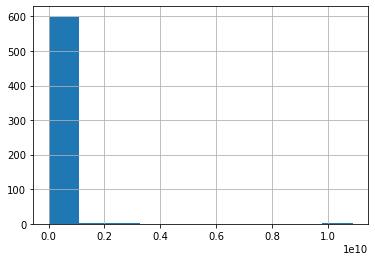

In [16]:
Df_data["People Impacted"].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe890ee3a00>]],
      dtype=object)

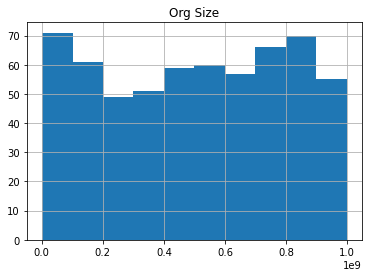

In [21]:
Df_data[Df_data["People Impacted"] < 1e9].hist()